# High cholesterol forecaster

## Outline


* [Part 0: Objective Summary](#Part-1:-Data-Exploration)
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Importance](#Part-4:-Feature-Selection)
* [Part 5: Conclusion and Suggestion](#Part-4:-Feature-Selection)



# Part 0: Objective Summary
To be continued.....


# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.set_option('display.max_columns',None) #有的时候当feature特别多的时候，column是展示不全的，这句code使得能看全全部feature.
pd.set_option('display.max_rows',None) #有的时候当row特别多的时候，row是展示不全的，这句code使得能看全全部row.
pd.set_option('max_colwidth',100) #??


In [ ]:
#data loading 这里是一种新的load data的方式。另一种load data的方式详见
from google.colab import files
uploaded = files.upload()

Saving m_new.csv to m_new.csv


In [ ]:
df_origin = pd.read_csv('m_new.csv', index_col=0) #这是最传统的read/load data的方式 https://www.jianshu.com/p/cbb01dd9beab
df=df_origin.copy()

In [ ]:
print ("Num of entries: " + str(df.shape[0]))
print ("Num of features: " + str(df.shape[1]))

Num of entries: 29727
Num of features: 47


### Part 1.2: Data cleaning

In [ ]:
#第一轮筛选，根据我的target，只保留了1和2，去掉了>2的值以及Nan得到df1.
df1 = df[(df['Hcholes_TF']<=2)]

### Part 1.3: Data exploration

In [ ]:
#对于year的转换先做，方便后面对trend的分析
df1['Survey_year'].loc[df1['Survey_year'] == 7] = '2011-12'
df1['Survey_year'].loc[df1['Survey_year'] == 8] = '2013-14'
df1['Survey_year'].loc[df1['Survey_year'] == 9] = '2015-16'

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

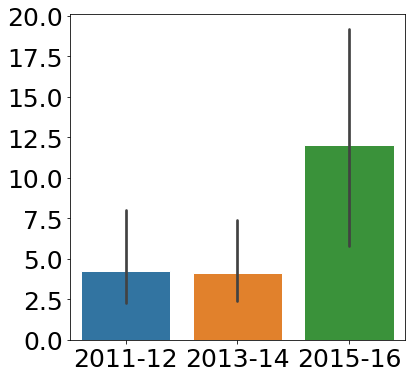

In [ ]:
#对于binary data非要看distribution的方法如下
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
#ax0.grid(False) # alpha to adjust grid transparency
#ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(22) # set xlabel size
#ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.set_color_codes()
sns.set_style("darkgrid")
#sns.barplot(x='Survey_year', y='num_meal_fastfood', data=df1)
#sns.barplot(x='Survey_year', y='num_meal_readytoeat', data=df1)
sns.barplot(x='Survey_year', y='num_meal_frozenfood', data=df1)
#sns.barplot(x='Survey_year', y='money_on_eatingout', data=df1,  estimator=sum)
ax0.set_xlabel('')
ax0.set_ylabel('')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
#plt.xticks(rotation=45)

In [ ]:
#根据missing value决定去掉哪些feature
#!!!!!education应该保留的 这里只是为了方便暂时删掉了，应该相加组合成新的feature
to_drop_list = ['edu_less16', 'edu_over20', 'drink_range', 'poor_diet_TF', 'lack_physical_activity_TF', 'extreme_hunger_TF', 'increased_tired_TF', 'very_thirsty_TF', 'love_suger_TF']
df2 = df1.drop(to_drop_list, axis=1)

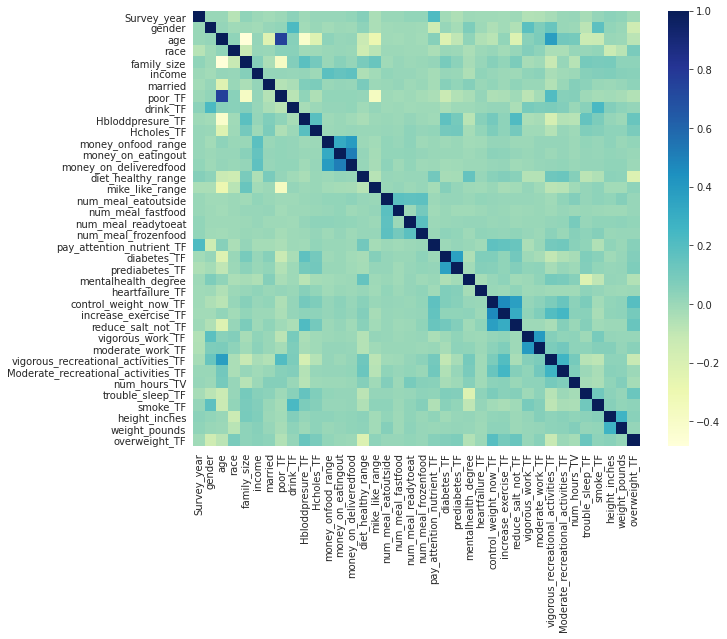

In [ ]:
#pearson correlation coefficient
all_features = list(df2.columns)
df_cor = df.drop(to_drop_list, axis=1)
corr = df_cor[all_features].corr()

fig,ax0=plt.subplots(nrows=1, figsize=(10,8))
ax0.grid(False) # alpha to adjust grid transparency
ax0.set_xlabel('X')
ax0.set_ylabel('Randomization')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
#ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.heatmap(corr, cmap="YlGnBu")

# Part 2: Feature Preprocessing

In [ ]:
#在处理其他binary数据之前，单独处理了married，得到df3
'''
1	Married	2737	2737
2	Widowed	462	3199
3	Divorced	641	3840
4	Separated	202	4042
5	Never married	1006	5048
6	Living with partner	515	5563
77	Refused	6	5569
99	Don't Know	0	5569
.	Missing	3685	9254 '''

df2['married'].value_counts()
df3 = df2.copy()
df3['married'].loc[df3['married'] == 5] = 0
df3['married'].loc[df3['married'] >= 77] = 0
df3['married'].loc[df3['married'] != 0] = 1


In [ ]:
#这个cell用来处理剩余binary feature, 用mode替换非postive的值，包括missing value。 最后转换成boolean得到df4
binary_categorical_withNan_list = ['drink_TF', 'gender',
 'poor_TF',
 'Hbloddpresure_TF',
 'diabetes_TF',
 'prediabetes_TF',
 'heartfailure_TF',
 'control_weight_now_TF',
 'increase_exercise_TF',
 'reduce_salt_not_TF',
 'vigorous_work_TF',
 'moderate_work_TF',
 'vigorous_recreational_activities_TF',
 'Moderate_recreational_activities_TF',
 'trouble_sleep_TF',
 'smoke_TF']

df4 = df3.copy()
for col in binary_categorical_withNan_list:
  mode = df4[col].mode().iloc[0]
  df4[col]=df4[col].fillna(mode)
  df4[col].loc[df[col] != 1] = 0
  df4[col] = df4[col] == 1

In [ ]:
#这里用来处理numerical feature, 把missing用median imputate, 把不符合的用median替代
numerical_feature_list_8400 = ['money_onfood_range', 'money_on_eatingout', 'money_on_deliveredfood']
numerical_feature_list_5555 = ['num_meal_eatoutside', 'num_meal_fastfood', 'num_meal_readytoeat', 'num_meal_frozenfood', 'height_inches', 'weight_pounds']
df5 = df4.copy()
for col in numerical_feature_list_8400:
  median = round(df5[col].median())
  df5[col] = df5[col].fillna(median)
  df5[col].loc[df5[col] > 8400] = median  #我觉得有了上面那步，这一步基本上可以用outlier处理，这里暂时这么处理！
for col in numerical_feature_list_5555:
  median = round(df5[col].median())
  df5[col] = df5[col].fillna(median)
  df5[col].loc[df5[col] > 5555] = median

In [ ]:
#单独处理一下num_hours_tv
median = round(df5['num_hours_TV'].median())
df5['num_hours_TV'] = df5['num_hours_TV'].fillna(median)
df5['num_hours_TV'].loc[df5['num_hours_TV'] > 5] = median

In [ ]:
median = round(df5['income'].median())
df5['income'] = df5['income'].fillna(median)
df5['income'].loc[df5['income'] >= 77] = median

Text(0, 0.5, '')

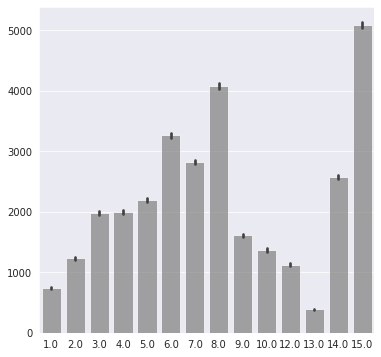

In [ ]:
#做feature binning之前的checking
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
#ax0.grid(False) # alpha to adjust grid transparency
ax0.xaxis.label.set_size(22) # set xlabel size
ax0.yaxis.label.set_size(22) # set xlabel size
#ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.set_color_codes()
sns.set_style('darkgrid')
#sns.barplot(x='Survey_year', y='num_meal_fastfood', data=df1)
#sns.barplot(x='Survey_year', y='num_meal_readytoeat', data=df1)
sns.barplot(x='income', y='Hcholes_TF', data=df5, estimator=sum, color = 'gray',alpha = 0.7)
#sns.barplot(x='Survey_year', y='money_on_eatingout', data=df1,  estimator=sum)
#ax0.set_xlabel('values of "income"')
#ax0.set_ylabel('count on labels')
ax0.set_xlabel('')
ax0.set_ylabel('')

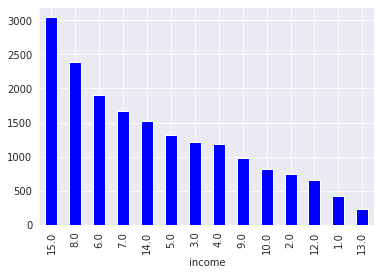

In [ ]:
#这里的income还可以拯救一下！
df_income = df5.copy()
#这里是针对categorical feature：当某个feature有非常多的value,炫技层面我们要看一下每个value对应有多少个plot一下，目的是告诉人们之后我如果直接做one-hot
#回导致产生过多dummy feature, 所以解决办法是把某些value对应值比较少的bin起来。还有就是与此同时看一下，label在这个feature上的分布，告诉人们明显是有区分label价值的。所以才这么做。
#df_income['income'].value_counts()
#df_income['income'].describe()
df_income_plot = df_income.groupby(['income'])['income'].count()
#dt_region_mean_bal = dt_region_mean_bal.reset_index()
sns.set_style("darkgrid")
df_income_plot.sort_values(ascending=False).plot.bar(color = 'blue')
#sns.barplot(x='income', y='Hcholes_TF', data=df5, estimator=sum)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

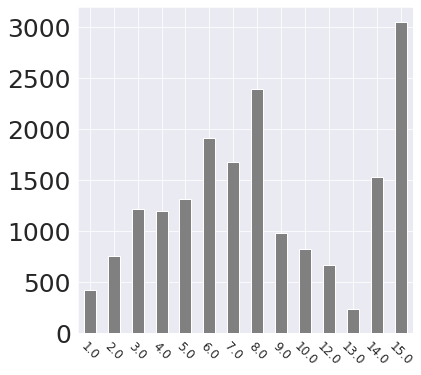

In [ ]:
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
ax0.grid(False)
ax0.set_xlabel('')
plt.xticks(rotation=0)
df_income_plot.plot.bar(color = 'gray')
ax0.set_xlabel('')
ax0.set_ylabel('')
plt.yticks(fontsize=25)
plt.xticks(fontsize=12)
plt.xticks(rotation=-45)

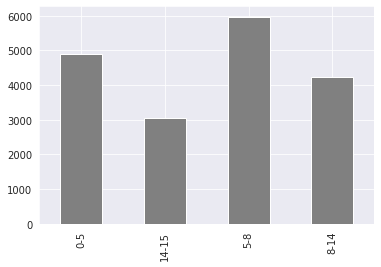

In [ ]:
#至于具体bin起来的方法
df_income['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
bin_income = [0, 5, 8, 14, 15]
income_range = ['0-5', '5-8', '8-14', '14-15']
df_income['income'] = pd.cut(df_income['income'], bin_income, labels= income_range)
#上面三句操作完了之后，income就会value就会从每个值变成bin的labels, 由于value不再是数值型的，想要看看新的distribution就要使用下面的句子再plot
df_income_plotonly = df_income['income'].str.get_dummies(sep=',').sum()
df_income_plotonly.plot.bar(color = 'gray')
#最后这一句是用来把新bin好了的feature，按照one_hot encoding处理融入新df
#df_income_final = pd.get_dummies(df_income_new, columns= ['income'])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

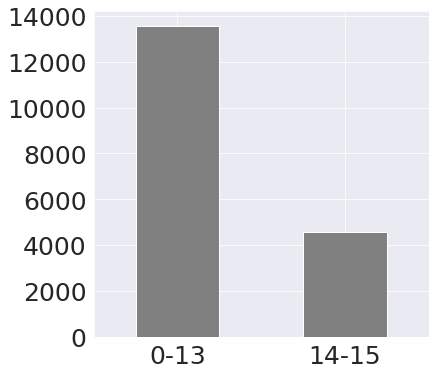

In [ ]:
#改成bin成两个 如果run出error要重新run一遍df5.copy那个cell
"""
df_income['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
bin_income = [0, 13, 15]
income_range = ['0-13', '14-15']
df_income['income'] = pd.cut(df_income['income'], bin_income, labels= income_range)
#上面三句操作完了之后，income就会value就会从每个值变成bin的labels, 由于value不再是数值型的，想要看看新的distribution就要使用下面的句子再plot
df_income_plotonly = df_income['income'].str.get_dummies(sep=',').sum()
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
ax0.grid(False)
df_income_plotonly.plot.bar(color = 'gray')

ax0.set_xlabel('')
ax0.set_ylabel('')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xticks(rotation=0)
"""

In [ ]:
'''
df_income_plotonly = df_income['income'].str.get_dummies(sep=',').count()
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
ax0.grid(False)
df_income_plotonly.plot.bar(color = 'gray')
ax0.set_xlabel('')
plt.xticks(rotation=0)
ax0.set_xlabel('')
ax0.set_ylabel('')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
'''

"\ndf_income_plotonly = df_income['income'].str.get_dummies(sep=',').count()\nfig,ax0=plt.subplots(nrows=1, figsize=(6,6))\nax0.grid(False)\ndf_income_plotonly.plot.bar(color = 'gray')\nax0.set_xlabel('')\nplt.xticks(rotation=0)\nax0.set_xlabel('')\nax0.set_ylabel('')\nplt.yticks(fontsize=25)\nplt.xticks(fontsize=25)\n"

In [ ]:
#最后这一句是用来把新bin好了的feature，按照one_hot encoding处理融入新df
df_income_final = pd.get_dummies(df_income, columns= ['income'])

In [ ]:
#把pay_attention_nutrient_TF以及mentalhealth_degree里面的missing value处理一下
median = round(df_income_final['pay_attention_nutrient_TF'].median())
df_income_final['pay_attention_nutrient_TF'] = df_income_final['pay_attention_nutrient_TF'].fillna(median)
median = round(df_income_final['mentalhealth_degree'].median())
df_income_final['mentalhealth_degree'] = df_income_final['mentalhealth_degree'].fillna(median)

In [ ]:
#orinal data通过one hot encoding处理
df6 = df_income_final.copy()
one_hot_list =['Survey_year',
  'diet_healthy_range',
 'mike_like_range',
 'pay_attention_nutrient_TF',
 'mentalhealth_degree',
 'overweight_TF']
df7 = pd.get_dummies(df6, columns= one_hot_list)

In [ ]:
#feature generation BMI
df8= df7.copy()
def BMI(series):
  weight = series["weight_pounds"]
  height = series["height_inches"]
  BMI = weight*703/height**2
  return BMI

df8["BMI"] = df8.apply(BMI,axis=1)
df8 = df8.drop(["weight_pounds", "height_inches"], axis=1)

In [ ]:
#df8.isnull().sum()

In [ ]:
#一些小tip方便check feature
#检查某个feature的type df['gender'].dtypes
#对于每个col的check
#df['income'].describe()
#print(df['income'].count() / df.shape[0] * 100) print(df['income'].isnull().sum() / df.shape[0] * 100) #检查missing value比例
#df['income'].value_counts() 查询某一列中各个值出现的数量
#df['income'].mode() #众数是多少
# boolean_array = (df['income'] > 10) ()内部产生boolean array #boolean masking选择出现某个值的次数 df['income'][boolean_array]
#将一列中的某个数替换成另一个数的方法有两个：1: df.loc[df['income'] == 77] = 20     2:df['income'].replace(77, 20, inplace=True)只有加了inplace=True才是真正改写否则只是复制
#将一列中的某个数替换成另一个数 注意的地方！！ 替换成mean可以直接写： df.loc[df['income'] == 11] = df['income'].mean() 换成众数要小心 df['income'].mode().iloc[0]
#按照某一列的值进行整体df的删选 test = df[(df['Hcholes_TF']<=2)] test是最后新生成的df

In [ ]:
#data cleaning#3: logical mistake--outlier
'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def iqr_outlier_rm(dt_input):
  lq,uq=np.percentile(dt_input,[25,75])
  lower_l=lq - 1.5*(uq-lq)
  upper_l=uq + 1.5*(uq-lq)
  return dt_input[(dt_input >=lower_l)&(dt_input<=upper_l)]

dt_churn=iqr_outlier_rm(churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]])
sns.boxplot(dt_churn,orient='v')
'''

'\n%matplotlib inline\nimport matplotlib.pyplot as plt\nimport seaborn as sns \n\ndef iqr_outlier_rm(dt_input):\n  lq,uq=np.percentile(dt_input,[25,75])\n  lower_l=lq - 1.5*(uq-lq)\n  upper_l=uq + 1.5*(uq-lq)\n  return dt_input[(dt_input >=lower_l)&(dt_input<=upper_l)]\n  \ndt_churn=iqr_outlier_rm(churn_df[["account_length", "number_vmail_messages", "total_day_minutes",\n                    "total_day_calls", "total_day_charge", "total_eve_minutes",\n                    "total_eve_calls", "total_eve_charge", "total_night_minutes",\n                    "total_night_calls", "total_intl_minutes", "total_intl_calls",\n                    "total_intl_charge"]])\nsns.boxplot(dt_churn,orient=\'v\')\n'

# Part 3: Model Training

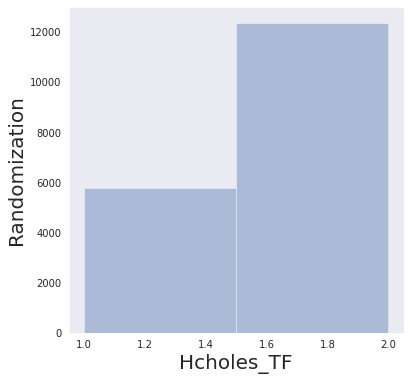

In [ ]:
#对于binary data非要看distribution的方法如下
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
ax0.grid(False) # alpha to adjust grid transparency
ax0.set_xlabel('X')
ax0.set_ylabel('Randomization')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.set_color_codes()
sns.distplot(df8['Hcholes_TF'],kde=False, bins=2, color = 'b')

### Part 2.3: Feature scaling

### Part 3.1: Split dataset

In [ ]:
# Get ground truth data #注意这里的data X是dataframe y是np.array
y = np.where(df8['Hcholes_TF'] == 1 ,1,0)
X = df8.drop(['Hcholes_TF'], axis=1)

In [ ]:
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 14496 observation with 64 features
test data has 3625 observation with 64 features


In [ ]:
#under sampling
'''
from imblearn.under_sampling import RandomUnderSampler
from sklearn import model_selection


RandomUnderSampler = RandomUnderSampler()
X_resampled, y_resampled = RandomUnderSampler.fit_sample(X, y)

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.2)
print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

In [ ]:
#Standarized the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1]:
#title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# SVM
classifier_SVC = SVC()

# Random Forest
classifier_RF = RandomForestClassifier()

# XGB
classifier_XGB = XGBClassifier()


In [ ]:
classifier_logistic.fit(X_train, y_train)
y_pred = classifier_logistic.predict(X_test)
classifier_logistic.score(X_test, y_test)

0.7417931034482759

In [ ]:
# Use 10-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest','SVM', 'XGBoost']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_SVC, classifier_XGB]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=10)
    print(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

[0.74551724 0.76827586 0.76       0.74827586 0.7537931  0.74827586
 0.73291925 0.75569358 0.74810214 0.73360939]
Model accuracy of Logistic Regression is: 0.749


KeyboardInterrupt: ignored

###Part 3.2: Model Training and Selection

###Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters: LinearRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
parameters = {
    'penalty':('l1', 'l2'),
    'C':(0.01, 0.1, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=10)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)
best_LR_model = Grid_LR.best_estimator_

Best score: 0.750
Best parameters set:
	C: 0.01
	penalty: 'l2'


In [ ]:
# Possible hyperparamter options for Random Forest--choose the best number of trees
parameters = {
    'n_estimators' : [50,100,200]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=10)
Grid_RF.fit(X_train, y_train)
print_grid_search_metrics(Grid_RF)
best_RF_model = Grid_RF.best_estimator_

Best score: 0.748
Best parameters set:
	n_estimators: 100


In [ ]:
# Possible hyperparamter options for KNN --choose the best k
parameters = {
    'n_neighbors':[1,10,100]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(X_train, y_train)
print_grid_search_metrics(Grid_KNN)
best_KNN_model = Grid_KNN.best_estimator_

Best score: 0.715
Best parameters set:
	n_neighbors: 100


In [ ]:
# Possible hyperparamter options for XGBoost #太长了 run不动的
parameters = {
    'max_depth': [5, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 200, 300, 500],
    'min_child_weight': [0, 2, 5, 10, 20],
    'max_delta_step': [0, 0.2, 0.6, 1, 2],
    'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
    'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
    'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]

}
Grid_XGB = GridSearchCV(classifier_XGB,parameters, cv=10)
Grid_XGB.fit(X_train, y_train)
print_grid_search_metrics(Grid_XGB)
best_XGB_model = Grid_XGB.best_estimator_

Best score: 0.747
Best parameters set:
	max_depth: 5


### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

## 4.1: Evaluate all models

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #新家的这一句是normalized的结果了
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)
    print ("tn is: %0.3f" % tn)
    print ("fp is: %0.3f" % fp)
    print ("fn is: %0.3f" % fn)
    print ("tp is: %0.3f" % tp)
    print ("f1 score is: %0.3f" % f1)


# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Healthy','High cholesterol']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap("YlGnBu"))
        #plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual values')
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        ax.xaxis.label.set_size(15)
        ax.yaxis.label.set_size(15)
        plt.show()

In [ ]:
#有的时候混淆矩阵会出现多个网格，可以先run一下这个最原始的def plot出正常的cm之后，再run我写的那个就神奇的好了！
'''
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        '''

Random Forest
Accuracy is: 0.501
precision is: 1.000
recall is: 0.003
tn is: 1.000
fp is: 0.000
fn is: 0.997
tp is: 0.003
f1 score is: 0.005


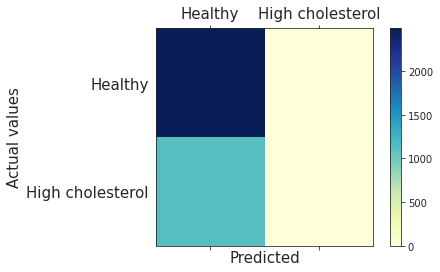

Logistic Regression
Accuracy is: 0.687
precision is: 0.786
recall is: 0.515
tn is: 0.860
fp is: 0.140
fn is: 0.485
tp is: 0.515
f1 score is: 0.622


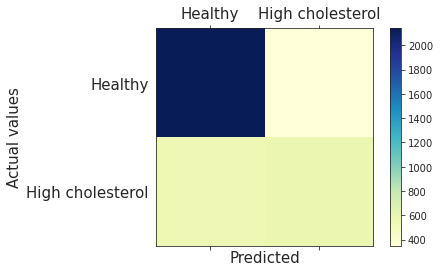

KNN
Accuracy is: 0.601
precision is: 0.830
recall is: 0.255
tn is: 0.948
fp is: 0.052
fn is: 0.745
tp is: 0.255
f1 score is: 0.390


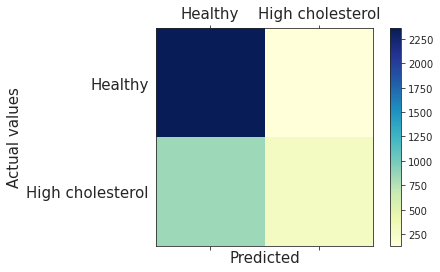

XGBoost
Accuracy is: 0.741
precision is: 0.832
recall is: 0.604
tn is: 0.878
fp is: 0.122
fn is: 0.396
tp is: 0.604
f1 score is: 0.700


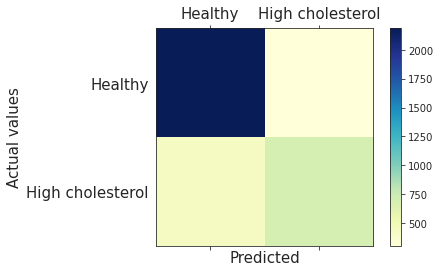

In [ ]:
#不改变threshod 数字是对应下下面那个图 还真搞不懂为啥会分裂成这么多格格
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
     ("KNN", confusion_matrix(y_test,best_KNN_model.predict(X_test))),
     ("XGBoost", confusion_matrix(y_test,best_XGB_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.676
precision is: 0.749
recall is: 0.531
tn is: 0.822
fp is: 0.178
fn is: 0.469
tp is: 0.531
f1 score is: 0.621


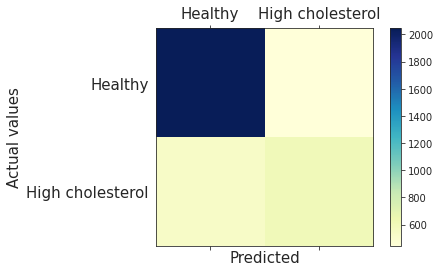

Logistic Regression
Accuracy is: 0.676
precision is: 0.749
recall is: 0.531
tn is: 0.822
fp is: 0.178
fn is: 0.469
tp is: 0.531
f1 score is: 0.621


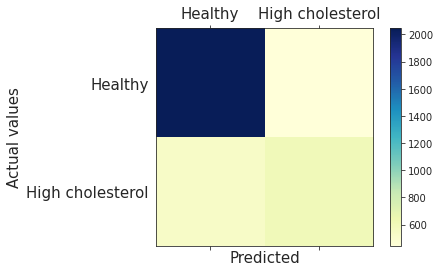

KNN
Accuracy is: 0.601
precision is: 0.830
recall is: 0.255
tn is: 0.948
fp is: 0.052
fn is: 0.745
tp is: 0.255
f1 score is: 0.390


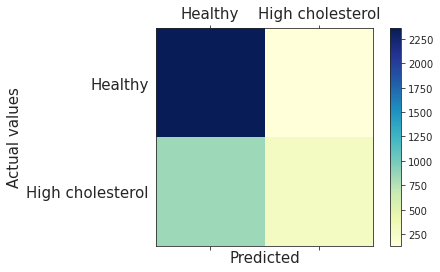

XGBoost
Accuracy is: 0.741
precision is: 0.832
recall is: 0.604
tn is: 0.878
fp is: 0.122
fn is: 0.396
tp is: 0.604
f1 score is: 0.700


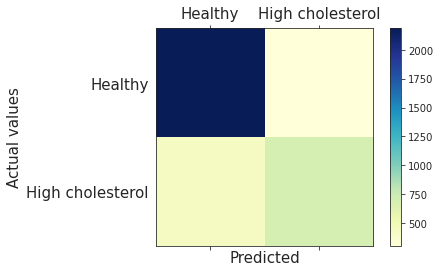

In [ ]:
#改变threshod
%matplotlib inline
new =  (best_RF_model.predict_proba(X_test)[:,1]>=0.3).astype(int)
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,new)),
    ("Logistic Regression", confusion_matrix(y_test,new)),
    ("KNN", confusion_matrix(y_test,best_KNN_model.predict(X_test))),
     ("XGBoost", confusion_matrix(y_test,best_XGB_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

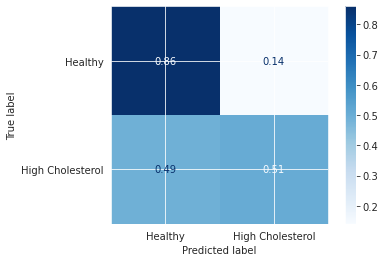

In [ ]:
#单独用一个model看confusion matrix的方法
from sklearn.metrics import plot_confusion_matrix
classifier = best_RF_model.fit(X_train, y_train)
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues,normalize='true', display_labels= ['Healthy','High Cholesterol'])
#After changing threshold from 0.5 -> 0.3,但是问题是使用plot_confusion_matrix画图，是用不到y_pred_new的，所以还是得回归到下面迭代那种写法，这里就是为了生成图
#y_pred_new =  (best_RF_model.predict_proba(X_test)[:,1]>=0.3).astype(int)
#plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues,normalize='true')


### Part 3.4: Model Evaluation - ROC & AUC

Part 3.4.1: ROC of RF Model 我想这里就展示最好的model就好了

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [ ]:
# Use predict_proba to get the probability results of Logistic regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _lr = roc_curve(y_test, y_pred_lr)

#from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test, y_pred_lr)

In [ ]:
# Use predict_proba to get the probability results of XGBoost
# 查看准确率
y_pred_xgb = best_XGB_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test, y_pred_xgb)

In [ ]:
# Use predict_proba to get the probability results of K nears neightbor
# 查看准确率
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _knn = roc_curve(y_test, y_pred_knn)

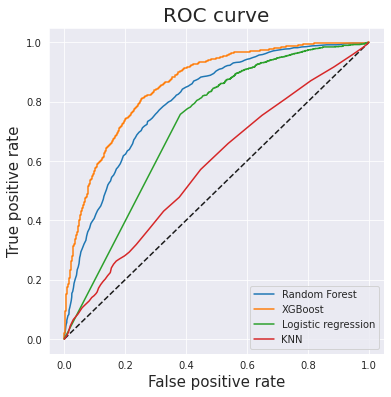

In [ ]:
# ROC curve of Random Forest result
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
sns.set_style('darkgrid')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_lr, tpr_lr, label='Logistic regression')
#plt.plot(fpr_nn, tpr_nn, label='Neural Network')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve', fontsize=20)
plt.legend(loc='best')
plt.rc('legend',fontsize=20)
plt.xticks(rotation=0)
#plt.yticks(fontsize=25)
#plt.xticks(fontsize=25)
ax0.set_xlabel('False positive rate', fontsize=15)
ax0.set_ylabel('True positive rate',fontsize=15)
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
print (metrics.auc(fpr_rf,tpr_rf))
print (metrics.auc(fpr_xgb,tpr_xgb))
print (metrics.auc(fpr_lr,tpr_lr))
print (metrics.auc(fpr_knn,tpr_knn))

0.79233033570857
0.7957839903692131
0.7961583406368682
0.7803550082491133


# Part 4: Feature Importance

### Part 4.1:  Random Forest Model - Feature Importance Discussion

In [ ]:
df8_col_importance = ['gender',
 'age',
 'race',
 'family_size',
 'married',
 'poverty',
 'drink_TF',
 'High_blood_pressure',
 'Hcholes_TF',
 'money_on_food',
 'money_on_eatingout',
 'money_on_deliveredfood',
 '#meal_eatoutside',
 '#meal_fastfood',
 '#meal_readytoeat',
 '#meal_frozenfood',
 'diabetes',
 'prediabetes_TF',
 'heartfailure_TF',
 'control_weight_now_TF',
 'increase_exercise_TF',
 'reduce_salt_not_TF',
 'vigorous_work_TF',
 'moderate_work_TF',
 'vigorous_recreational_activities_TF',
 'Moderate_recreational_activities_TF',
 '#hours_TV',
 'trouble_sleep_TF',
 'smoke_TF',
 'income_0-5',
 'income_5-8',
 'income_8-14',
 'income_14-15',
 'Survey_year_2011-2012',
 'Survey_year_2013-2014',
 'Survey_year_2015-2016',
 'diet_healthy_range_1.0',
 'diet_healthy_range_2.0',
 'diet_healthy_range_3.0',
 'diet_healthy_range_4.0',
 'diet_healthy_range_5.0',
 'diet_healthy_range_9.0',
 'mike_like_range_0.0',
 'mike_like_range_1.0',
 'mike_like_range_2.0',
 'mike_like_range_3.0',
 'mike_like_range_4.0',
 'mike_like_range_9.0',
 'pay_attention_nutrient_TF_1.0',
 'pay_attention_nutrient_TF_2.0',
 'pay_attention_nutrient_TF_3.0',
 'pay_attention_nutrient_TF_4.0',
 'pay_attention_nutrient_TF_9.0',
 'mentalhealth_degree_0.0',
 'mentalhealth_degree_1.0',
 'mentalhealth_degree_2.0',
 'mentalhealth_degree_3.0',
 'mentalhealth_degree_7.0',
 'mentalhealth_degree_9.0',
 'overweight_TF_1.0',
 'overweight_TF_2.0',
 'overweight_TF_3.0',
 'overweight_TF_7.0',
 'overweight_TF_9.0',
 'BMI']

In [ ]:
df8_col_importance_withoutHclo = ['gender',
 'age',
 'race',
 'family_size',
 'married',
 'poverty',
 'drink_TF',
 'High_blood_pressure',
 'money_on_food',
 'money_on_eatingout',
 'money_on_deliveredfood',
 '#meal_eatoutside',
 '#meal_fastfood',
 '#meal_readytoeat',
 '#meal_frozenfood',
 'diabetes',
 'prediabetes_TF',
 'heartfailure_TF',
 'control_weight_now_TF',
 'increase_exercise_TF',
 'reduce_salt_not_TF',
 'vigorous_work_TF',
 'moderate_work_TF',
 'vigorous_recreational_activities_TF',
 'Moderate_recreational_activities_TF',
 '#hours_TV',
 'trouble_sleep_TF',
 'smoke_TF',
 'income_0-5',
 'income_5-8',
 'income_8-14',
 'income_14-15',
 'Survey_year_2011-2012',
 'Survey_year_2013-2014',
 'Survey_year_2015-2016',
 'diet_healthy_range_1.0',
 'diet_healthy_range_2.0',
 'diet_healthy_range_3.0',
 'diet_healthy_range_4.0',
 'diet_healthy_range_5.0',
 'diet_healthy_range_9.0',
 'mike_like_range_0.0',
 'mike_like_range_1.0',
 'mike_like_range_2.0',
 'mike_like_range_3.0',
 'mike_like_range_4.0',
 'mike_like_range_9.0',
 'pay_attention_nutrient_TF_1.0',
 'pay_attention_nutrient_TF_2.0',
 'pay_attention_nutrient_TF_3.0',
 'pay_attention_nutrient_TF_4.0',
 'pay_attention_nutrient_TF_9.0',
 'mentalhealth_degree_0.0',
 'mentalhealth_degree_1.0',
 'mentalhealth_degree_2.0',
 'mentalhealth_degree_3.0',
 'mentalhealth_degree_7.0',
 'mentalhealth_degree_9.0',
 'overweight_TF_1.0',
 'overweight_TF_2.0',
 'overweight_TF_3.0',
 'overweight_TF_7.0',
 'overweight_TF_9.0',
 'BMI']

In [ ]:
importances = best_RF_model.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

In [ ]:
df_feature_importance = pd.DataFrame(importances , index=df8_col_importance_withoutHclo, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance = df_feature_importance.drop(['race'])
df_new = df_feature_importance[(df_feature_importance['feature importance']> 0.02)].reset_index()

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]),
 <a list of 9 Text major ticklabel objects>)

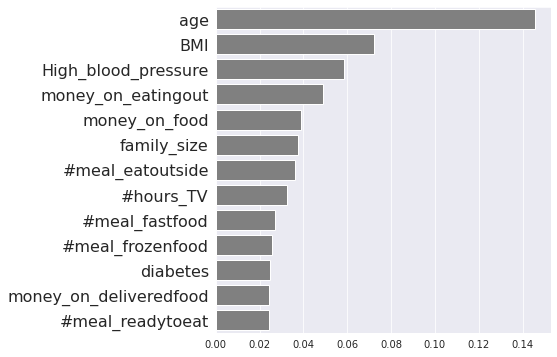

In [ ]:
#看所有feature importance
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
#ax0.grid(False) # alpha to adjust grid transparency
#ax0.xaxis.label.set_size(20) # set xlabel size
#ax0.yaxis.label.set_size(22) # set xlabel size
#ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.set_style('darkgrid')
sns.set_color_codes()
sns.barplot(y = 'index' , x='feature importance', data=df_new, color = 'gray')
#sns.barplot(x='Survey_year', y='money_on_eatingout', data=df1,  estimator=sum)
ax0.set_xlabel('')
ax0.set_ylabel('')
plt.yticks(fontsize=16)
plt.xticks(fontsize=10)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text major ticklabel objects>)

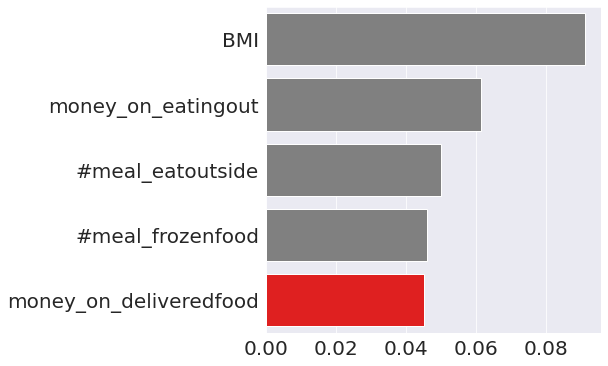

In [ ]:
#只看年轻人的feature importance
df8.columns = df8_col_importance
df_young = df8[(df8['age']<=24)]
y_young = np.where(df_young['Hcholes_TF'] == 1 ,1,0)
X_young = df_young.drop(['Hcholes_TF'], axis=1)
forest = RandomForestClassifier()
forest.fit(X_young, y_young)
importances_young = forest.feature_importances_
df_importance_young = pd.DataFrame(importances_young, index=X_young.columns.values, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_young_importance = df_importance_young[(df_importance_young['feature importance']> 0.043)].reset_index()
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
sns.set_style('darkgrid')
sns.set_color_codes()
certain = ['gray' if (x != df_young_importance.iloc[4][1]) else 'red' for x in df_young_importance['feature importance'] ]
sns.barplot(y = 'index' , x='feature importance', data=df_young_importance, palette=certain)
ax0.set_xlabel('')
ax0.set_ylabel('')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

(array([0.  , 0.04, 0.08, 0.12]), <a list of 4 Text major ticklabel objects>)

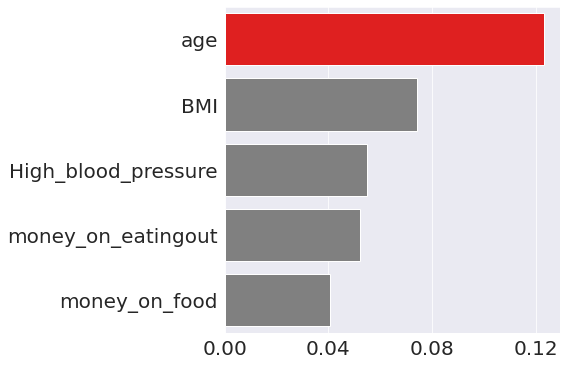

In [ ]:
#只看老年人的feature importance
df8.columns = df8_col_importance
df_old = df8[(df8['age'] > 24)]
y_old = np.where(df_old['Hcholes_TF'] == 1 ,1,0)
X_old = df_old.drop(['Hcholes_TF'], axis=1)
forest_old = RandomForestClassifier()
forest_old.fit(X_old, y_old)
importances_old = forest_old.feature_importances_
df_importance_old = pd.DataFrame(importances_old, index=X_old.columns.values, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_old_importance = df_importance_old[(df_importance_old['feature importance']> 0.04)].reset_index()
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
sns.set_style('darkgrid')
sns.set_color_codes()
certain_old = ['gray' if (x != df_old_importance.iloc[0][1]) else 'red' for x in df_old_importance['feature importance'] ]
sns.barplot(y = 'index' , x='feature importance', data=df_old_importance, palette=certain_old)
ax0.set_xlabel('')
ax0.set_ylabel('')
plt.yticks(fontsize=20)
#plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 0.13, step=0.04))
plt.xticks(fontsize=20)

In [ ]:
#补充EDA #Distribution of target value on age
df8['Hcholes_TF']
df_age_high = df8[(df8['Hcholes_TF']==1)]
df_age_health = df8[(df8['Hcholes_TF']==2)]

Text(0, 0.5, '')

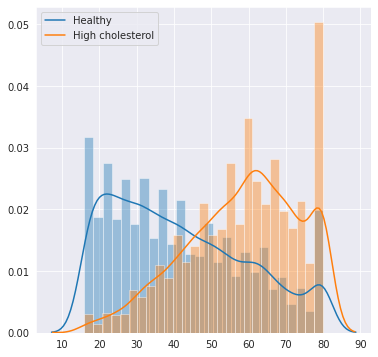

In [ ]:
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
#ax0.grid(False) # alpha to adjust grid transparency
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
#ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.set_style('darkgrid')
#sns.barplot(x='Survey_year', y='money_on_eatingout', data=df1,  estimator=sum)
sns.distplot(df_age_health['age'], kde_kws={"label":"Healthy"});
sns.distplot(df_age_high['age'], kde_kws={"label":"High cholesterol"});
#ax0.set_xlabel('Age')
#ax0.set_ylabel('Percentage')
ax0.set_xlabel('')
ax0.set_ylabel('')
#ax0.set_xticks(np.arange(0, 100, 20))

In [ ]:
#补充EDA #Distribution of target value on weight
df7['Hcholes_TF']
df_weight_high = df7[(df7['Hcholes_TF']==1)]
df_weight_health = df7[(df7['Hcholes_TF']==2)]

Text(0, 0.5, '')

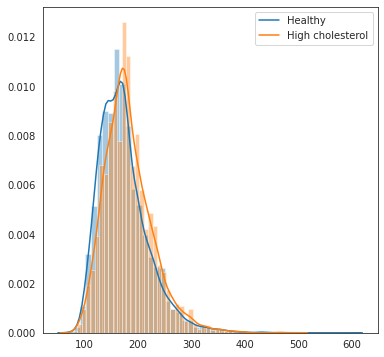

In [ ]:
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
ax0.grid(False) # alpha to adjust grid transparency
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
#ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.set_style('white')
#sns.barplot(x='Survey_year', y='money_on_eatingout', data=df1,  estimator=sum)
sns.distplot(df_weight_health['weight_pounds'], kde_kws={"label":"Healthy"});
sns.distplot(df_weight_high['weight_pounds'], kde_kws={"label":"High cholesterol"});
#ax0.set_xlabel('Weight')
#ax0.set_ylabel('Percentage')
ax0.set_xlabel('')
ax0.set_ylabel('')

Text(0, 0.5, '')

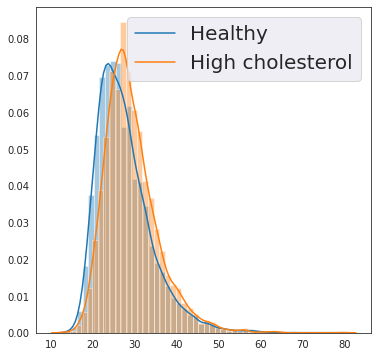

In [ ]:
#补充EDA #Distribution of target value on BMI
fig,ax0=plt.subplots(nrows=1, figsize=(6,6))
#ax0.grid(False) # alpha to adjust grid transparency
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
#ax0.set_ylim(top=13000)
#ax0.set_xticks([1, 2])
#plt.xticks(rotation=-45) # adjust xticks
#ax0.legend()
sns.set_style('darkgrid')
#sns.barplot(x='Survey_year', y='money_on_eatingout', data=df1,  estimator=sum)
sns.distplot(df_age_health['BMI'], kde_kws={"label":"Healthy"});
sns.distplot(df_age_high['BMI'], kde_kws={"label":"High cholesterol"});
#ax0.set_xlabel('BMI')
#ax0.set_ylabel('Percentage')
ax0.set_xlabel('')
ax0.set_ylabel('')

#注意哦 以下是我用的Neural network好使的 但是效果不好因为没tune hyerparameter

In [ ]:
features = list(X.columns)
X1 = X.loc[:, features].values
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.2)

In [ ]:
features = list(X.columns)
X1 = X.loc[:, features].values
from sklearn import model_selection


# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.2)
X_train = np.float32(X_train)
y_train = np.float32(y_train)
X_test = np.float32(X_test)
y_test = np.float32(y_test)

In [ ]:
features = list(X.columns)
X1 = X.loc[:, features].values
from sklearn import model_selection


# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.2)
X_train = np.float32(X_train)
y_train = np.float32(y_train)
X_test = np.float32(X_test)
y_test = np.float32(y_test)

import sklearn.datasets
import torch
import numpy as np

#np.random.seed(0)
#X, y = sklearn.datasets.make_moons(200,noise=0.2)

X = X_train
y = y_train
X11 = X_test
y11 = y_test

import matplotlib.pyplot as plt

#plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.binary)


X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)
X11 = torch.from_numpy(X11).type(torch.FloatTensor)
y11 = torch.from_numpy(y11).type(torch.LongTensor)


import torch.nn as nn
import torch.nn.functional as F

#our class must extend nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data.
        self.fc1 = nn.Linear(64,55)

        #This applies linear transformation to produce output data
        self.fc2 = nn.Linear(55,40)
        self.fc3 = nn.Linear(40,20)
        self.fc4 = nn.Linear(20,2)

    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.fc1(x)
        #Activation function is Relu. Feel free to experiment with this
        x = F.relu(x)
        #This produces output
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.tanh(x)
        x = self.fc4(x)
        return x

    #This function takes an input and predicts the class, (0 or 1)
    def predict(self,x):
        #Apply softmax to output
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

    def predict_prob(self,x):
        #Apply softmax to output
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
          ans.append(t[1])
        return torch.tensor(ans)




#Initialize the model
model = Net()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#Number of epochs
epochs = 50000
#List to store losses
losses = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(X)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()


from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print(accuracy_score(model.predict(X11),y11))
print(recall_score(model.predict(X11),y11))


def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

0.752551724137931
0.602177554438861


In [ ]:
# Use predict_proba to get the probability results of NN
# 查看准确率
y_pred_nn= model.predict_prob(X11).numpy()
fpr_nn, tpr_nn, _nn = roc_curve(y11.numpy(), y_pred_nn)